# Linear Regression: Feature Scaling

Before passing data into a machine learning algorithm, we often want to scale our features.  At a high level, we do this so that a data point on one scale does not look irrelevant when compared to a data point on another scale (for example, startup stock prices ranging from \\$10 to \\$20, vs their volume being hundreds to thousands of trades per day).  In this notebook, we will explain what this means, and how we scale our data.

When performing machine learning, we often work with NumPy arrays, as the fundamental machine learning library SciKit-Learn is built on NumPy.  

# 1. General Setup

In [1]:
# Import analytics libraries
import pandas as pd
import numpy as np

# The preprocessing sublibrary from sklearn allows us to scale our data
from sklearn.preprocessing import StandardScaler

# Import other support
import os

In [2]:
# Raise errors instead of give warnings
pd.set_option('mode.chained_assignment', 'raise')

In [3]:
# Import stock data
data_file_path = os.path.join('data', 'stocks.csv')
stocks = pd.read_csv(data_file_path, index_col='Date')

# Preview dataframe
display(stocks.head())

Adj. Close  Open-Close Percent Change  High-Low Percent Change  \
Date                                                                         
2004-08-19   50.322842                   0.324968                 8.441017   
2004-08-20   54.322689                   7.227007                 8.537313   
2004-08-23   54.869377                  -1.227880                 4.062357   
2004-08-24   52.597363                  -5.726357                 7.753210   
2004-08-25   53.164113                   1.183658                 3.966115   

            Adj. Volume   Forecast  
Date                                
2004-08-19   44659000.0  69.078238  
2004-08-20   22834300.0  67.839414  
2004-08-23   18256100.0  68.912727  
2004-08-24   15247300.0  70.668146  
2004-08-25    9188600.0  71.219849

# 2. Feature Scaling

In machine learning, features are generally denoted with an uppercase $X$, and labels are denoted with a lowercase $y$.$^{1}$

In [4]:
# Define X (the features) as everything except the Forecast column
X = np.array(stocks.drop(['Forecast'], 1))

# Define y (the label) as the Forecast column
y = np.array(stocks['Forecast'])

print(f'Features:\n {X}\n')
print(f'Labels:\n {y}')

Features:
 [[ 5.03228418e+01  3.24967503e-01  8.44101709e+00  4.46590000e+07]
 [ 5.43226889e+01  7.22700723e+00  8.53731343e+00  2.28343000e+07]
 [ 5.48693765e+01 -1.22788010e+00  4.06235672e+00  1.82561000e+07]
 ...
 [ 1.02655000e+03 -2.36072933e+00  4.08929913e+00  2.41351700e+06]
 [ 1.05409000e+03  3.32191129e-01  4.81802529e+00  3.27240900e+06]
 [ 1.00694000e+03 -5.35388664e+00  6.70796496e+00  2.94095700e+06]]

Labels:
 [69.0782379  67.83941377 68.91272699 ...         nan         nan
         nan]


## 2.1 Why Feature Scaling Is Important

While it is not strictly necessary, you may want to scale your features before training your machine learning classifier.  One of the most popular methods of scaling data is through standardization, (or Z-score normalization), which is what we cover in this notebook.  This rescales the features such that they have a normal distribution with a mean of zero and a standard deviation of one.$^{2}$<br>

Datasets often contains features of varying scales, magnitudes, units, or range.  Algorithms that use Euclidean Distance are sensitive to magnitude, and this could result in misleading the classifier.$^{4}$  For example, when referring to closing stock prices for two consecutive days, the first day may have a price of \\$50, while the second day has a price of \\$51—a change of $1.  However, when referring to volumes for the same two days, the first day may have a volume of 900,000 trades, while the second day has a volume of 1,000,000 trades—a change of 100,000 trades.  100,000 is certaintly larger than 1, but one is measuring trades, while the other is measuring dollars.

In our case, consider the data points for 2004-08-25, and 35 days later, in Figure 1.

In [5]:
display(stocks.head())
display(stocks.head(40).tail(1))
print('\nFigure 1.')

Adj. Close  Open-Close Percent Change  High-Low Percent Change  \
Date                                                                         
2004-08-19   50.322842                   0.324968                 8.441017   
2004-08-20   54.322689                   7.227007                 8.537313   
2004-08-23   54.869377                  -1.227880                 4.062357   
2004-08-24   52.597363                  -5.726357                 7.753210   
2004-08-25   53.164113                   1.183658                 3.966115   

            Adj. Volume   Forecast  
Date                                
2004-08-19   44659000.0  69.078238  
2004-08-20   22834300.0  67.839414  
2004-08-23   18256100.0  68.912727  
2004-08-24   15247300.0  70.668146  
2004-08-25    9188600.0  71.219849

Adj. Close  Open-Close Percent Change  High-Low Percent Change  \
Date                                                                         
2004-10-14   71.219849                   0.694937                 2.756928   

            Adj. Volume   Forecast  
Date                                
2004-10-14   10442100.0  90.479301


Figure 1.


Our first day has an adjusted close price of \\$53.16, and a volume of 9188600; 35 days later, we have a close price of \\$71.21, and a volume of 10442100.

Over 35 days then, the close price changed by 18.05 units, while the volume changed by 1253500 units.  It may appear then that volume has large variation, while close price barely changes at all, and thus that close price is an irrelevant data point.  We must recall though that these two measurements are measured using different units, and are thus on different scales.  While close price is measured in dollars, volume is measured in trades, and while 18 more trades some time later is hardly a change at all, 18 more dollars is substantial growth for 35 days.  Furthermore, by examining the percent change rather than the actual unit change, we see that the close price changed by 34%, while volume changed by only 14% during this period.  On it's smaller scale, close price actually varied more than volume during this period!

We will now examine this visually.

In [6]:
# Import visualization library
# %matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# Create copy of original data
X_original = X.copy(order='C')

# Initialize standard scaler
scaler = StandardScaler()

# Fit our data; this computes the mean and standard deviation to be used later for scaling
scaler.fit(X, y)

# Scale our features, using the computed mean and standard deviation from fitting
X_scaled = scaler.transform(X)

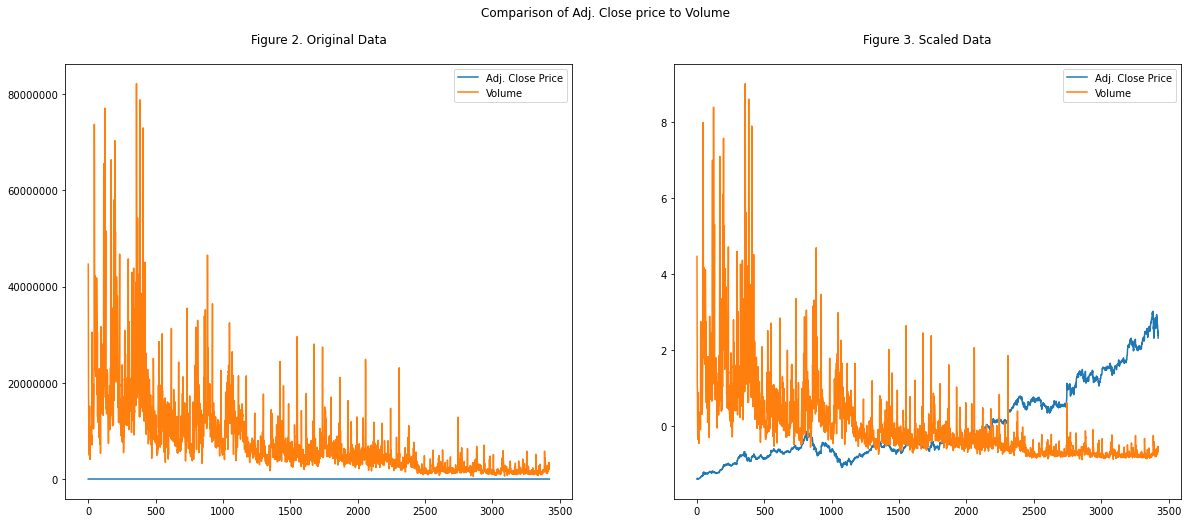

In [8]:
# Create figure for side-by-side comparison
plt.figure(figsize=(20,8))
plt.suptitle('Comparison of Adj. Close price to Volume\n')

# Plot original Adj. Close price and Volume on same graph
plt.subplot(1,2,1)
plt.plot(X_original[:,0], label='Adj. Close Price')
plt.plot(X_original[:,3], label='Volume')
plt.ticklabel_format(style='plain')
plt.legend()
plt.title('Figure 2. Original Data\n')

# Plot scaled Adj. Close price and Volume on same graph
plt.subplot(1,2,2)
plt.plot(X_scaled[:,0], label='Adj. Close Price')
plt.plot(X_scaled[:,3], label='Volume')
plt.legend()
plt.title('Figure 3. Scaled Data\n')

plt.show()

As can be seen in Figure 2, it appears that the adjusted close prices hardly changes at all. Using this unscaled data could mislead the machine learning classifier into not giving this feature enough weight, though we can see from Figure 3 that this feature has just as much variance as the volume, and maybe even more at times.

Next we will observe the same features, both before and after being scaled, to visually see how scaling actually affects the graphical appearance of the data.

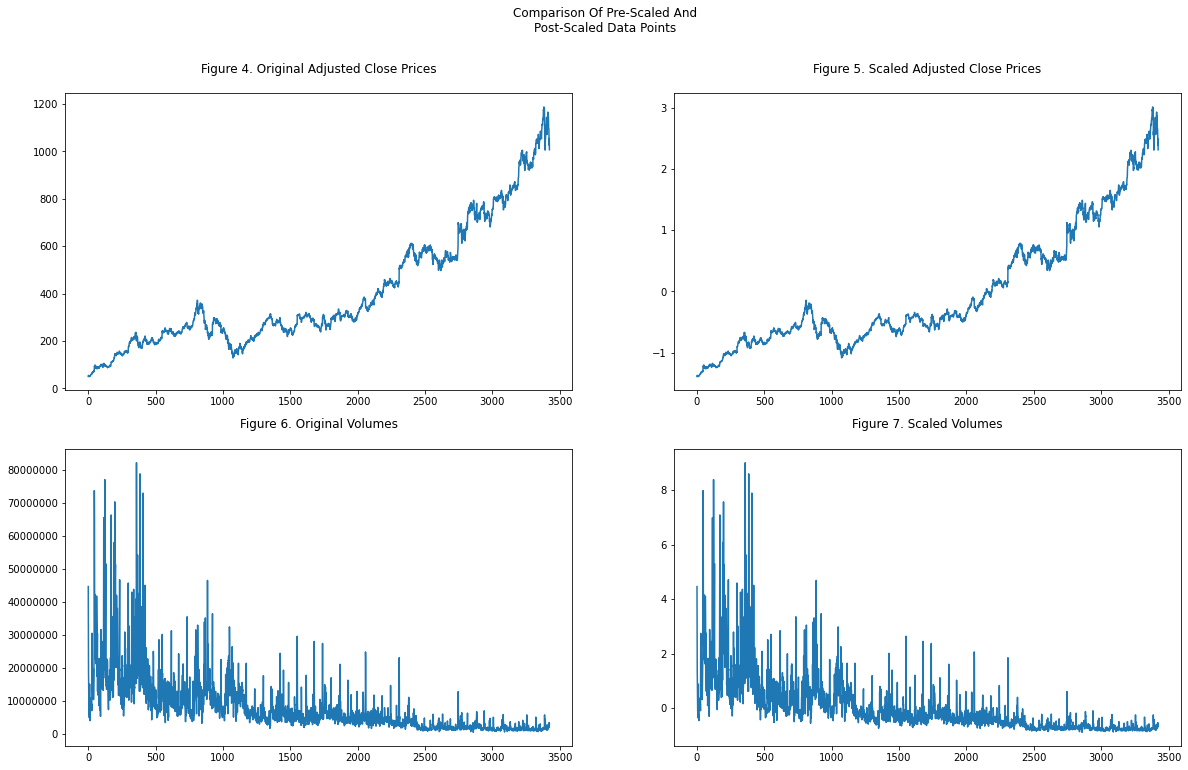

In [9]:
# Create figure for side-by-side comparison
plt.figure(figsize=(20,12))
plt.suptitle('Comparison Of Pre-Scaled And\nPost-Scaled Data Points')

# Plot pre-scaled Adj. Close price
plt.subplot(2,2,1)
plt.plot(X_original[:,0], label='Adj. Close Price')
plt.title('Figure 4. Original Adjusted Close Prices\n')

# Plot scaled Adj. Close price
plt.subplot(2,2,2)
plt.plot(X_scaled[:,0], label='Adj. Close Price')
plt.title('Figure 5. Scaled Adjusted Close Prices\n')

# Plot pre-scaled Adj. Close price
plt.subplot(2,2,3)
plt.plot(X_original[:,3], label='Adj. Close Price')
plt.ticklabel_format(style='plain')
plt.title('Figure 6. Original Volumes\n')

# Plot scaled Adj. Close price
plt.subplot(2,2,4)
plt.plot(X_scaled[:,3], label='Adj. Close Price')
plt.title('Figure 7. Scaled Volumes\n')

plt.show()

As we can see in Figures 4-7, the graphical appearance of the data does not change at all!  It is only the scale which has been affected!  The unscaled close prices in Figure 4 have a y-axis ranging from 0 to 1200, while the scaled data in Figure 5 has a y-axis ranging from about -2 to 3.  The unscaled data in Figure 6 has a statistical range from approximately 1,000,000 to 80,000,000, while the scaled data in Figure 7 has a range from about -1 to 8.

This is scaling.  The graphical appearance of your data does not change.  The only change is putting all featurres on the same scale.  The exact scale itself depends on the scaling method you use.  In this notebook, we are using standardization, which will examine next.

## 2.2 How Standardization Scaling Works

Scikit-learn defines standardizaiton as rescaling features such that they have a standard normal distribution with a mean of zero and a standard deviation of one."$^{2}$

We do this by converting each data point to it's Z-score.  Recall that the Z-score is just a measurement of how many standard deviations a given data point is away from the dataset mean (or in other words, how "normal" that point is considering what the mean is; most data points are close to the mean in a standard normal distribution).  The formula for calculating the Z-score is:

$$
\displaystyle Z = \frac{x-\mu}{\sigma}
$$

where $x$ is a given data point, $\mu$ is the dataset mean, and $\sigma$ is the dataset standard deviation.

If we examine these datapoints for our adjusted close prices we get the following:

$$
\displaystyle Z = \frac{50.32284179174975 - 409.05788478499363}{257.7358502421395} = -1.391870951038503
$$


In [10]:
# Get the pre-scaled Adj. Close price for the first day
adj_close_price_first_day = X_original[:,0][0]

# Get the mean of the pre-scaled Adj. Close prices
adj_close_price_mean = X_original[:,0].mean()

# Get the standard deviation of the pre-scaled Adj. Close prices
adj_close_price_standard_deviation = X_original[:,0].std()

# Calculte the Z-Score for the Adj. Close price on the first day
adj_close_price_first_day_Z_Score = (adj_close_price_first_day - adj_close_price_mean) \
                                  / adj_close_price_standard_deviation

print(f'Adj. Close price on first day: {adj_close_price_first_day}')
print(f'Mean of (pre-scaled) Adj. Close prices: {adj_close_price_mean}')
print(f'Standard Deviation of (pre-scaled) Adj. Close prices: {adj_close_price_standard_deviation}')
print(f'Z-Score of Adj. Close price on first day: {adj_close_price_first_day_Z_Score}')

Adj. Close price on first day: 50.32284179174975
Mean of (pre-scaled) Adj. Close prices: 409.05788478499363
Standard Deviation of (pre-scaled) Adj. Close prices: 257.7358502421395
Z-Score of Adj. Close price on first day: -1.391870951038503


Now, we examine the first datapoint for adjusted close prices in our scaled data.

In [11]:
# Print the scaled Adj. Close price for the first day

print(X_scaled[:,0][0])

-1.391870951038503


This is how the standardization scaling works.  The same formula is applied to every value in an array, to produce an array of each feature's Z-Score.  This scaled array is then what is used when training the classifier, putting each feature on a similar scale.

We will end by examining a histogram of original data and scaled data to see what this means visually.

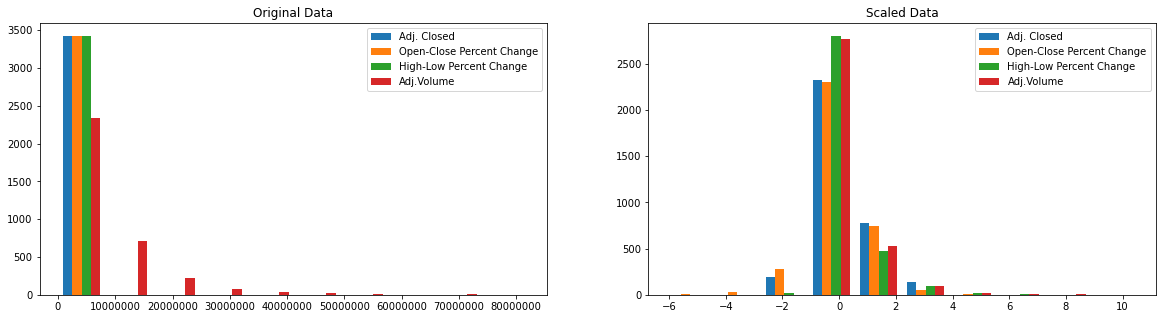

Figure 8.


In [12]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.hist(X_original)
plt.ticklabel_format(style='plain')
labels = ['Adj. Closed', 'Open-Close Percent Change', 'High-Low Percent Change', 'Adj.Volume']
plt.legend(labels)
plt.title('Original Data')

plt.subplot(1,2,2)
plt.hist(X_scaled)
labels = ['Adj. Closed', 'Open-Close Percent Change', 'High-Low Percent Change', 'Adj.Volume']
plt.legend(labels)
plt.title('Scaled Data')
plt.show()

print('Figure 8.')

In Figure 8, our unscaled data shows us that most data points (prices and percent changes) are relatively close to 0, while volume grows as large as 80,000,000, heavily skewing the histrogram to the right.  In scaled data, everything is measured in standard deviations from that data point's own mean.  To better understand this, we'll take a quick look at the means for adjusted close prices and for volumes.

In [13]:
adj_close_mean = X_original[:,0].mean()
volume_mean = X_original[:,3].mean()

print(f'Adjusted close price mean: {adj_close_price_mean}')
print(f'Volume mean: {volume_mean}')

Adjusted close price mean: 409.05788478499363
Volume mean: 7818567.596670561


Then, we will examine how many standard deviations the first adjusted close price is away from the close price mean, and how many standard deviations the first volume is away from the volume mean.

In [14]:
first_adj_close_price_z_score = X_scaled[1,0]
first_volume_z_score = X_scaled[1,3]

print(f'First Adjusted Close Price Z-Score: {first_adj_close_price_z_score}')
print(f'Fire Volume Z-Score: {first_volume_z_score}')

First Adjusted Close Price Z-Score: -1.3763517784391202
Fire Volume Z-Score: 1.820749502591838


The first adjusted close price is about 1.37 standard deviations away from the close price mean, in a negative direction, while the first volume is about 1.82 standard deviations away from the volume mean, in a positive direction.  As we continue to plot points on a histogram, we will naturally develop a standard normal distribution of the data points as a whole.

# 3. Closing Comment

Note that when we scaled our data, we did the following:

In [15]:
# Create copy of original data
X_original = X.copy(order='C')

# Initialize standard scaler
scaler = StandardScaler()

# Fit our data; this computes the mean and standard deviation to be used later for scaling
scaler.fit(X, y)

# Scale our features, using the computed mean and standard deviation from fitting
X_scaled = scaler.transform(X)
print(X_scaled)

[[-1.39187095  0.23254018  4.32619572  4.46712802]
 [-1.37635178  4.81828847  4.39248725  1.8207495 ]
 [-1.37423066 -0.79917922  1.3118745   1.26561472]
 ...
 [ 2.39583323 -1.55184968  1.33042197 -0.65539548]
 [ 2.50268682  0.23733959  1.83208562 -0.55124957]
 [ 2.31974758 -3.54051775  3.13314228 -0.59144015]]


But we could have just as easily done the following:

In [16]:
X_scaled_2 = scaler.fit_transform(X,y)
print(X_scaled_2)

[[-1.39187095  0.23254018  4.32619572  4.46712802]
 [-1.37635178  4.81828847  4.39248725  1.8207495 ]
 [-1.37423066 -0.79917922  1.3118745   1.26561472]
 ...
 [ 2.39583323 -1.55184968  1.33042197 -0.65539548]
 [ 2.50268682  0.23733959  1.83208562 -0.55124957]
 [ 2.31974758 -3.54051775  3.13314228 -0.59144015]]


The fit_transform() method simly fits and transform the data at once$^{3}$.  Why would we want to fit and transform separately then?  Suppose, for example, that we want to transform our training data in addition to our testing data, or that we get new data points.  If we transform these, they need to use the same mean and standard deviation that transormed our testing data with.  We can then save this fitted scaler to use on new training data, or new data points, until we have enough new data to rescale.

# Sources: 
1. <a href="https://pythonprogramming.net/training-testing-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Training and Testing</a>
2. <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html" target="_blank">Scikit-learn: Importance of Feature Scaling</a>
3. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform' target='_blank'>sklearn.preprocessing.StandardScaler</a>
4. <a href="https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/" target="_blank"> GeeksforGeeks: Python | How and where to apply Feature Scaling?</a>
5. <a href='https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models#:~:text=In%20summary%2C%20fit%20performs%20the,in%20one%20possibly%20optimized%20step.' target='blank'>What's the difference between fit and fit_transform in scikit-learn models?<a/>